In [105]:
pip install kmodes

Note: you may need to restart the kernel to use updated packages.


In [106]:
# Import libraries
from kmodes.kmodes import KModes
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

In [107]:
# Load the data
data = pd.read_csv('micro_world.csv', engine='python')

In [108]:
# Show the data
data

,economy,economycode,regionwb,pop_adult,wpid_random,wgt,female,age,educ,inc_q,...,receive_wages,receive_transfers,receive_pension,receive_agriculture,pay_utilities,remittances,pay_onlne,pay_onlne_mobintbuy,pay_cash,pay_cash_mobintbuy
0,Afghanistan,AFG,South Asia,19456060.0,139880545,1.936754,1,18.0,2.0,1,...,4,4,4,2.0,2,5.0,0.0,NaN,0.0,NaN
1,Afghanistan,AFG,South Asia,19456060.0,111705622,0.332867,2,25.0,1.0,5,...,4,4,4,4.0,4,5.0,0.0,NaN,0.0,NaN
2,Afghanistan,AFG,South Asia,19456060.0,128866217,1.338906,2,40.0,1.0,2,...,4,4,4,4.0,2,5.0,0.0,NaN,0.0,NaN
3,Afghanistan,AFG,South Asia,19456060.0,138171768,0.275619,2,45.0,1.0,1,...,4,4,4,4.0,4,5.0,0.0,NaN,0.0,NaN
4,Afghanistan,AFG,South Asia,19456060.0,125156190,0.629304,1,30.0,1.0,4,...,4,4,4,4.0,4,5.0,0.0,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154918,Zimbabwe,ZWE,Sub-Saharan Africa (excluding high income),9467437.0,167986916,0.413192,2,56.0,1.0,3,...,4,4,4,4.0,4,5.0,0.0,NaN,0.0,NaN
154919,Zimbabwe,ZWE,Sub-Saharan Africa (excluding high income),9467437.0,121992603,0.576707,1,56.0,1.0,4,...,4,4,4,4.0,4,2.0,0.0,NaN,0.0,NaN
154920,Zimbabwe,ZWE,Sub-Saharan Africa (excluding high income),9467437.0,137769624,1.481972,1,36.0,2.0,4,...,4,4,4,4.0,4,1.0,0.0,NaN,0.0,NaN
154921,Zimbabwe,ZWE,Sub-Saharan Africa (excluding high income),9467437.0,181215643,0.259968,1,35.0,3.0,5,...,1,4,4,3.0,1,1.0,0.0,NaN,0.0,NaN


In [109]:
# Filter Philippines
philippine_data = data[
    data['economy']=='Philippines'
]

In [110]:
# Show Philippine data
philippine_data

,economy,economycode,regionwb,pop_adult,wpid_random,wgt,female,age,educ,inc_q,...,receive_wages,receive_transfers,receive_pension,receive_agriculture,pay_utilities,remittances,pay_onlne,pay_onlne_mobintbuy,pay_cash,pay_cash_mobintbuy
114292,Philippines,PHL,East Asia & Pacific (excluding high income),70293928.0,180129353,0.261434,2,66.0,1.0,1,...,4,2,2,4.0,2,3.0,0.0,NaN,0.0,NaN
114293,Philippines,PHL,East Asia & Pacific (excluding high income),70293928.0,171987745,0.424916,2,24.0,3.0,5,...,1,4,4,4.0,4,1.0,0.0,0.0,1.0,1.0
114294,Philippines,PHL,East Asia & Pacific (excluding high income),70293928.0,178228576,0.732469,2,88.0,1.0,4,...,4,2,2,4.0,2,5.0,0.0,NaN,0.0,NaN
114295,Philippines,PHL,East Asia & Pacific (excluding high income),70293928.0,193725076,0.388121,2,30.0,2.0,5,...,4,4,4,4.0,2,5.0,0.0,NaN,0.0,NaN
114296,Philippines,PHL,East Asia & Pacific (excluding high income),70293928.0,194711242,2.333196,2,33.0,3.0,5,...,1,1,4,2.0,2,1.0,0.0,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115287,Philippines,PHL,East Asia & Pacific (excluding high income),70293928.0,151988960,1.249522,1,27.0,2.0,1,...,2,4,4,2.0,2,5.0,0.0,NaN,0.0,NaN
115288,Philippines,PHL,East Asia & Pacific (excluding high income),70293928.0,138300933,0.697020,1,68.0,1.0,1,...,4,4,4,4.0,4,5.0,0.0,NaN,0.0,NaN
115289,Philippines,PHL,East Asia & Pacific (excluding high income),70293928.0,134514859,2.614345,2,18.0,2.0,4,...,2,4,4,4.0,4,2.0,0.0,0.0,1.0,1.0
115290,Philippines,PHL,East Asia & Pacific (excluding high income),70293928.0,145841428,1.916246,1,20.0,2.0,4,...,2,4,4,4.0,2,2.0,0.0,NaN,0.0,NaN


In [111]:
# Filter data
cluster_data = philippine_data[
    [
        'inc_q',
        'saved',
        'account',
        'emp_in',
        'mobileowner'
    ]
]

In [112]:
#check distribution of those who has saved/did not saved
cluster_data['saved'].value_counts()

1    595
0    405
Name: saved, dtype: int64

In [113]:
#check distribution of those who has an account/not
cluster_data['account'].value_counts()

0    632
1    368
Name: account, dtype: int64

In [114]:
#check distribution of those who are employed
cluster_data['emp_in'].value_counts()

1.0    646
0.0    354
Name: emp_in, dtype: int64

In [115]:
#check distribution of income group
cluster_data['inc_q'].value_counts()

5    228
4    209
3    203
1    192
2    168
Name: inc_q, dtype: int64

In [116]:
#check distribution of those with mobile phones
cluster_data['mobileowner'].value_counts()

1.0    755
2.0    243
3.0      1
4.0      1
Name: mobileowner, dtype: int64

In [117]:
# Create dictionaries for mapping
income_group_mapping = {
    1:'poorest 20%',
    2:'second 20%',
    3:'middle 20%',
    4:'fourth 20%',
    5:'richest 20%'
}
employment_group = {
    0:'out of workforce',
    1:'in workforce'
}

saving_group_mapping = {
    0:'did not saved',
    1:'has saved'
  
}

acccount_group_mapping = {
    0:'does not have account',
    1:'has account'
  
}

mobilephone_ownership_mapping = {
    1: 'yes',
    2: 'no',
    3: 'no',
    4: 'no'
}

In [118]:
cluster_data = cluster_data.replace(
{ 'inc_q': income_group_mapping,
 'emp_in': employment_group,
 'saved': saving_group_mapping,
 'account': acccount_group_mapping,
 'mobileowner': mobilephone_ownership_mapping
})

In [119]:
cluster_data

,inc_q,saved,account,emp_in,mobileowner
114292,poorest 20%,has saved,does not have account,out of workforce,no
114293,richest 20%,has saved,has account,in workforce,yes
114294,fourth 20%,has saved,has account,in workforce,no
114295,richest 20%,has saved,has account,in workforce,yes
114296,richest 20%,has saved,has account,in workforce,yes
...,...,...,...,...,...
115287,poorest 20%,did not saved,does not have account,in workforce,yes
115288,poorest 20%,did not saved,does not have account,out of workforce,no
115289,fourth 20%,has saved,does not have account,in workforce,yes
115290,fourth 20%,has saved,does not have account,in workforce,yes


In [120]:
# Create clustering function
def run_kmodes(n_clusters=None, cluster_data=None):
  # Initialize clustering
  kmodes = KModes(
      init="random",
      n_clusters=n_clusters,
      random_state=42
      )
  
  # Apply clustering to the data
  kmodes.fit(cluster_data)

  # Print intertia
  print(f"Cost for n_clusters = {n_clusters}: {kmodes.cost_}")

  return kmodes.cost_, kmodes.labels_

In [121]:
# Create container for cost
cost_values = []

In [122]:
# Run clustering and save inertia to our empty container
for k in range(1, 11):
  # Run our function
  cost, labels = run_kmodes(
    n_clusters=k,
    cluster_data=cluster_data
  )

  # Save cost to our container
  cost_values.append(cost)

Cost for n_clusters = 1: 2144.0
Cost for n_clusters = 2: 1615.0
Cost for n_clusters = 3: 1319.0
Cost for n_clusters = 4: 1186.0
Cost for n_clusters = 5: 1076.0
Cost for n_clusters = 6: 1013.0
Cost for n_clusters = 7: 921.0
Cost for n_clusters = 8: 873.0
Cost for n_clusters = 9: 794.0
Cost for n_clusters = 10: 758.0


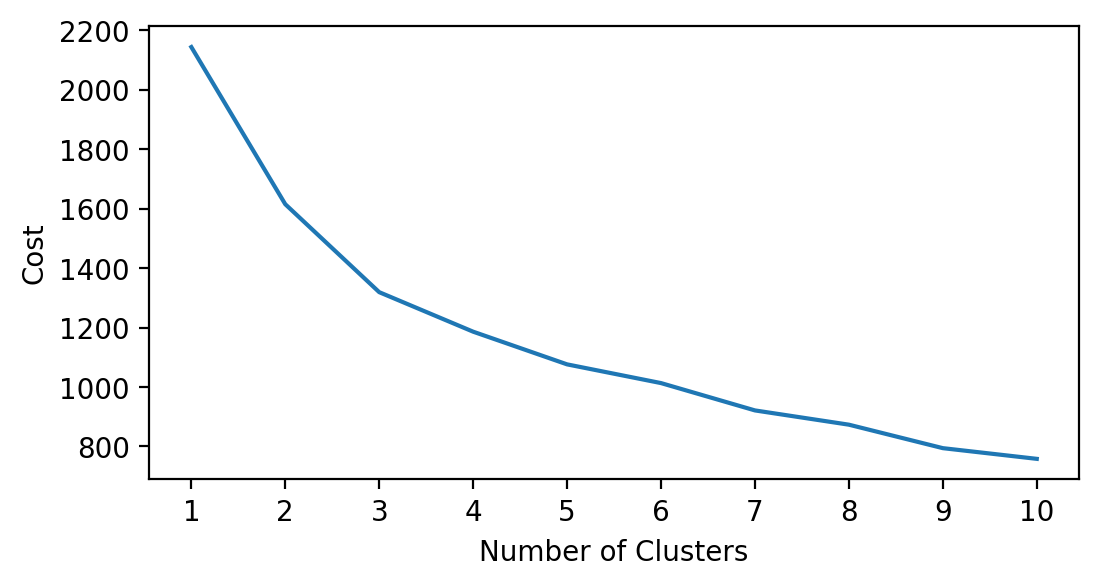

In [123]:
# Set figure size
plt.figure(figsize=(6,3)  , dpi=200)

# Plot inertia vs number of clusters
plt.plot(range(1, 11), cost_values)

# Format plot
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Cost")

# Show plot
plt.show()

In [124]:
# Run our K-Modes function for n_clusters=6
cost, labels = run_kmodes(
  n_clusters=5,
  cluster_data=cluster_data
)

Cost for n_clusters = 5: 1076.0


In [125]:
# Append the labels to cluster data
cluster_data['labels'] = labels

In [126]:
cluster_data

,inc_q,saved,account,emp_in,mobileowner,labels
114292,poorest 20%,has saved,does not have account,out of workforce,no,3
114293,richest 20%,has saved,has account,in workforce,yes,2
114294,fourth 20%,has saved,has account,in workforce,no,0
114295,richest 20%,has saved,has account,in workforce,yes,2
114296,richest 20%,has saved,has account,in workforce,yes,2
...,...,...,...,...,...,...
115287,poorest 20%,did not saved,does not have account,in workforce,yes,3
115288,poorest 20%,did not saved,does not have account,out of workforce,no,3
115289,fourth 20%,has saved,does not have account,in workforce,yes,0
115290,fourth 20%,has saved,does not have account,in workforce,yes,0


In [127]:
# Inspect the characteristics 
cluster_data.groupby('labels').agg(pd.Series.mode)

,inc_q,saved,account,emp_in,mobileowner
labels,,,,,
0,fourth 20%,has saved,does not have account,in workforce,yes
1,middle 20%,did not saved,has account,in workforce,no
2,richest 20%,has saved,has account,in workforce,yes
3,poorest 20%,did not saved,does not have account,in workforce,no
4,middle 20%,did not saved,does not have account,out of workforce,yes


In [128]:
cluster_data['labels'].value_counts()

0    389
2    216
4    164
3    153
1     78
Name: labels, dtype: int64

In [129]:
reasons = philippine_data[['fin11a', 'fin11b', 'fin11c', 'fin11d', 'fin11e', 'fin11f', 'fin11g', 'fin11h']]
reasons

,fin11a,fin11b,fin11c,fin11d,fin11e,fin11f,fin11g,fin11h
114292,1.0,1.0,1.0,2.0,2.0,2.0,3.0,2.0
114293,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
114294,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
114295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
114296,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
115287,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0
115288,1.0,1.0,1.0,3.0,2.0,1.0,2.0,1.0
115289,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0
115290,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0


In [130]:
fin11a_mapping = {
    1: 1,
    2: 0,
    3: 0,
    4: 0
}

fin11b_mapping = {
    1: 1,
    2: 0,
    3: 0,
    4: 0
}

fin11c_mapping = {
    1: 1,
    2: 0,
    3: 0,
    4: 0
}

fin11d_mapping = {
    1: 1,
    2: 0,
    3: 0,
    4: 0
}

fin11e_mapping = {
    1: 1,
    2: 0,
    3: 0,
    4: 0
}

fin11f_mapping = {
    1: 1,
    2: 0,
    3: 0,
    4: 0
}

fin11g_mapping = {
    1: 1,
    2: 0,
    3: 0,
    4: 0
}

fin11h_mapping = {
    1: 1,
    2: 0,
    3: 0,
    4: 0
}

In [131]:
reasons = reasons.replace(
{ 'fin11a': fin11a_mapping,
 'fin11b': fin11b_mapping,
 'fin11c': fin11c_mapping,
 'fin11d': fin11d_mapping,
 'fin11e': fin11e_mapping,
 'fin11f': fin11f_mapping,
 'fin11g': fin11g_mapping,
 'fin11h': fin11h_mapping,
})

In [132]:
# Rename columns
reasons = reasons.rename(
    columns = {
        'fin11a' : 'FI are too far away',
        'fin11b' : 'FS are too expensive',
        'fin11c': 'No necessary documentation',
        'fin11d': 'No trust in FI',
        'fin11e': 'Religious reasons',
        'fin11f': 'Not enough money to use FI',
        'fin11g': 'Family already has an account',
        'fin11h': 'No need for formal FI'
        }
)

In [133]:
cluster_data = cluster_data.join(reasons)

In [134]:
cluster_data

,inc_q,saved,account,emp_in,mobileowner,labels,FI are too far away,FS are too expensive,No necessary documentation,No trust in FI,Religious reasons,Not enough money to use FI,Family already has an account,No need for formal FI
114292,poorest 20%,has saved,does not have account,out of workforce,no,3,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
114293,richest 20%,has saved,has account,in workforce,yes,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
114294,fourth 20%,has saved,has account,in workforce,no,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
114295,richest 20%,has saved,has account,in workforce,yes,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
114296,richest 20%,has saved,has account,in workforce,yes,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115287,poorest 20%,did not saved,does not have account,in workforce,yes,3,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
115288,poorest 20%,did not saved,does not have account,out of workforce,no,3,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
115289,fourth 20%,has saved,does not have account,in workforce,yes,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
115290,fourth 20%,has saved,does not have account,in workforce,yes,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [135]:
cluster_data.fillna(0)

,inc_q,saved,account,emp_in,mobileowner,labels,FI are too far away,FS are too expensive,No necessary documentation,No trust in FI,Religious reasons,Not enough money to use FI,Family already has an account,No need for formal FI
114292,poorest 20%,has saved,does not have account,out of workforce,no,3,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
114293,richest 20%,has saved,has account,in workforce,yes,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
114294,fourth 20%,has saved,has account,in workforce,no,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
114295,richest 20%,has saved,has account,in workforce,yes,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
114296,richest 20%,has saved,has account,in workforce,yes,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115287,poorest 20%,did not saved,does not have account,in workforce,yes,3,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
115288,poorest 20%,did not saved,does not have account,out of workforce,no,3,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
115289,fourth 20%,has saved,does not have account,in workforce,yes,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
115290,fourth 20%,has saved,does not have account,in workforce,yes,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [137]:
cluster_data.groupby('labels').sum()['FI are too far away']

labels
0    144.0
1      9.0
2      7.0
3     71.0
4     52.0
Name: FI are too far away, dtype: float64

In [141]:
reasons_table = cluster_data.groupby(['labels']).agg(
    FI_are_too_far_away=('FI are too far away', 'sum'),
    FS_are_too_expensive = ('FS are too expensive', 'sum'),
    No_necessary_documentation = ('No necessary documentation', 'sum'),
    No_trust_in_FI = ('No trust in FI', 'sum'),
    Religious_reasons = ('Religious reasons', 'sum'),
    Not_enough_money_to_use_FI = ('Not enough money to use FI', 'sum'),
    Family_already_has_account = ('Family already has an account', 'sum'),
    No_need_for_FS = ('No need for formal FI', 'sum')  
).reset_index()
reasons_table

,labels,FI_are_too_far_away,FS_are_too_expensive,No_necessary_documentation,No_trust_in_FI,Religious_reasons,Not_enough_money_to_use_FI,Family_already_has_account,No_need_for_FS
0,0,144.0,177.0,151.0,65.0,41.0,228.0,93.0,143.0
1,1,9.0,11.0,9.0,5.0,2.0,16.0,6.0,8.0
2,2,7.0,15.0,11.0,7.0,5.0,17.0,10.0,13.0
3,3,71.0,89.0,66.0,36.0,29.0,105.0,28.0,55.0
4,4,52.0,78.0,70.0,33.0,18.0,111.0,39.0,57.0


In [159]:
no_account_reasons = reasons_table.loc[reasons_table['labels'].isin([0,3,4])]
no_account_reasons

,labels,FI_are_too_far_away,FS_are_too_expensive,No_necessary_documentation,No_trust_in_FI,Religious_reasons,Not_enough_money_to_use_FI,Family_already_has_account,No_need_for_FS
0,0,144.0,177.0,151.0,65.0,41.0,228.0,93.0,143.0
3,3,71.0,89.0,66.0,36.0,29.0,105.0,28.0,55.0
4,4,52.0,78.0,70.0,33.0,18.0,111.0,39.0,57.0


Check Profile of other clusters

In [160]:
demo = philippine_data[['female', 'age']]

In [161]:
cluster_data_demo = cluster_data.join(demo)

In [174]:
cluster_data_demo.groupby('labels').mean()['age']

labels
0    36.773779
1    48.217949
2    39.763889
3    48.718954
4    38.810976
Name: age, dtype: float64

In [178]:
cluster_data_demo.groupby(['labels', 'female']).count()['age']/cluster_data_demo.groupby(['labels']).count()['age']*100

labels  female
0       1         47.557841
        2         52.442159
1       1         44.871795
        2         55.128205
2       1         39.814815
        2         60.185185
3       1         51.633987
        2         48.366013
4       1         32.317073
        2         67.682927
Name: age, dtype: float64